STAT0013 Exercise 7 Problems

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import statistics as stat
import math as m

In [2]:
############
### Data ###
############

dates = ['2009-10-15', '2009-10-16', '2009-10-19', '2009-10-20', '2009-10-21', 
         '2009-10-22', '2009-10-23', '2009-10-26', '2009-10-27', '2009-10-28', 
         '2009-10-29']
voda_prices = [136.05, 134.34, 134.2, 133.55, 134.9, 139.5, 137.5, 136.4, 136.697,
                137.143, 137.838]

# Convert dates to datetime objects
from datetime import datetime
dates = [datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [3]:
################################################
### Computing drift and volatility estimates ###
################################################ 

def list_difference(data):
    diff_list = []
    for i, price in enumerate(data):
        if i < len(data) - 1:
            diff = m.log(data[i+1]) - m.log(data[i])
            diff_list.append(diff)
    return diff_list

def sample_mean(data):
    sum=0
    for i in data:
        sum += i
    average = sum/len(data)
    return average

def sample_variance(data):
    sum=0
    for i in data:
        sum += (float(i) - sample_mean(data))**2
    variance = sum/(len(data)-1)
    return variance

ulist= list_difference(voda_prices);

mu = 252 * (sample_mean(ulist) + (1/2) * sample_variance(ulist))
sigma = (252 * sample_variance(ulist))**0.5

print("µ (Drift estimate):", mu)
print("σ (Volatility estimate):", sigma)

µ (Drift estimate): 0.3529250242145817
σ (Volatility estimate): 0.2186241891099298


In [243]:
############################################
### Simulating geometric brownian motion ###
############################################


def geometric_BM(S0, drift, volatility, T, N):
    dt = (T/N)/252
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size=N+1) * np.sqrt(t*dt)
    X = (drift - 0.5*volatility**2)*(t*dt) + volatility * W
    S = S0 * np.exp(X)
    return S

S = geometric_BM(voda_prices[0], mu, sigma, len(voda_prices)-1, len(voda_prices)-1)
S_list = S.tolist()
S_list

def monte_carlo_sim(generations):
    arraysum = 0
    for i in range(1,generations+1):
        arraysum += geometric_BM(voda_prices[0], mu, sigma, len(voda_prices)-1, len(voda_prices)-1)
    average_array = arraysum/generations
    return average_array

S_list = geometric_BM(voda_prices[0], mu, sigma, len(voda_prices)-1, len(voda_prices)-1).tolist()
Savg_list = monte_carlo_sim(10000).tolist()


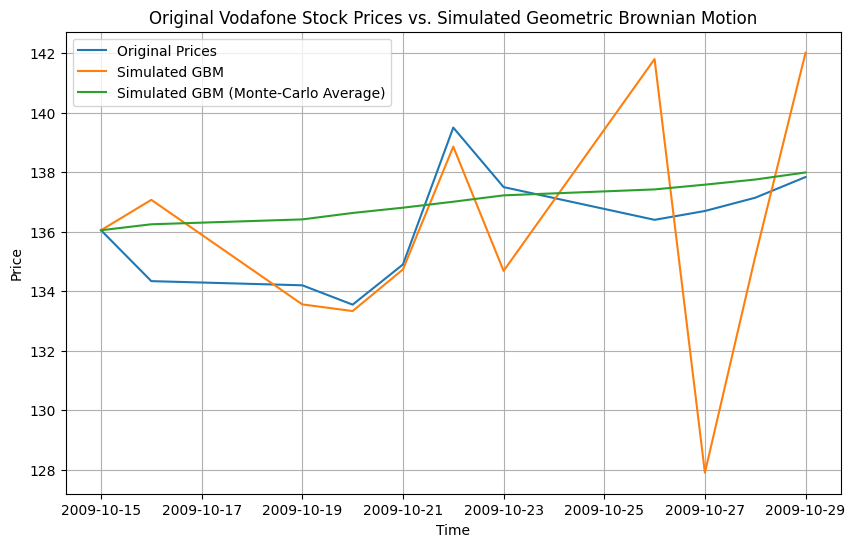

In [245]:
######################
### Plot the graph ###
######################

plt.figure(figsize=(10, 6))
plt.plot(dates, voda_prices, label='Original Prices', linestyle='-')
plt.plot(dates, S_list, label='Simulated GBM', linestyle='-')
plt.plot(dates, Savg_list, label='Simulated GBM (Monte-Carlo Average)', linestyle='-')
plt.title('Original Vodafone Stock Prices vs. Simulated Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()